# Lab 1: Getting Started with Image Processing

## <font color = orange> 1. What is an image? </font>

- An image is a 2-dimensional function f(x,y) that maps a coordinate-pair to an integer/real value representing intensity/color of the point.

- Each point in an image is called a pixel or pel (picture element).

- Images can have single or multiple channels.
    - Single-channel images include binary, monochrome, grayscale, and black-and-white images.
    
    - Colored images such as RGB images have multiple channels, with each pixel represented by a three-tuple ($R_{x, y}$, $G_{x, y}$, $B_{x, y}$).
    
- In an RGB image, each channel represents a primary color (red, green, or blue) and the combination of the three channels creates the color of each pixel.


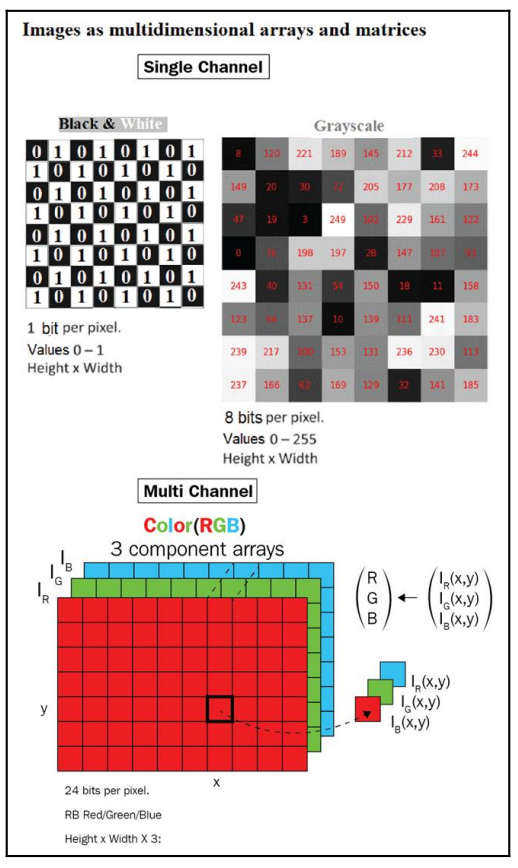

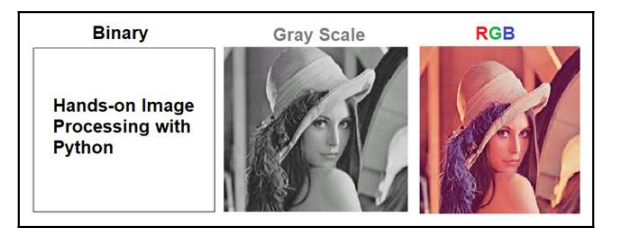

## <font color = orange> 2. How the image is stored on the computer? </font>

In order to process an image on a computer, it needs to be converted into a digital form that can be stored and manipulated by the computer. This digital conversion process involves two steps: <b> sampling and quantization </b>.

- <b> Sampling (Digitization of the spatial coordinates): </b>  refers to the process of converting the continuous spatial coordinates (x,y) of an image into discrete values. 

- <b> Quantization (Amplitude digitization): </b>   refers to the process of converting the continuous intensity values of an image into a finite set of discrete values. This involves mapping the continuous range of intensity values to a finite number of levels. The most common number of levels used is 256, which corresponds to an 8-bit image. 

Once an image has been sampled and quantized, it can be stored in a computer file format. There are many different types of image file formats, each with its own advantages and disadvantages. Some of the most commonly used file formats include JPEG, PNG, BMP, and TIFF. The choice of file format depends on factors such as the size of the image, the desired level of compression, and the intended use of the image.

## <font color = orange> 3. The image processing pipeline </font>

1. <b> Acquisition and storage:</b> The image needs to be captured (using a camera, for example) and stored on some device (such as a hard disk) as a file (for example, a JPEG file).

2. <b> Load into memory and save to disk:</b> The image needs to be read from the disk into memory and stored using some data structure (for example, numpy ndarray)

3. <b> Manipulation, enhancement, and restoration: </b> We need to run some preprocessing algorithms to do the following:
    - Run a few transformations on the image (sampling and manipulation; for example, grayscale conversion)
    - Enhance the quality of the image (filtering; for example, deblurring)
    - Restore the image from noise degradation

4. <b>Segmentation: </b> The image needs to be segmented in order to extract the objects of interest.

5. <b> Information extraction/representation: </b> The image needs to be represented in some alternative form; for example, one of the following:

    - Some hand-crafted feature-descriptor can be computed (for example, HOG descriptors, with classical image processing) from the image.

    - Some features can be automatically learned from the image (for example, the weights and bias values learned in the hidden layers of a neural net with deep learning)
    
    - The image is going to be represented using that alternative representation 





6. <b> Image understanding/interpretation:</b> This representation will be used to understand the image better with the following:

    - Image classification (for example, whether an image contains a human object or not)
    
    - Object recognition (for example, finding the location of the car objects in an image with a bounding box)


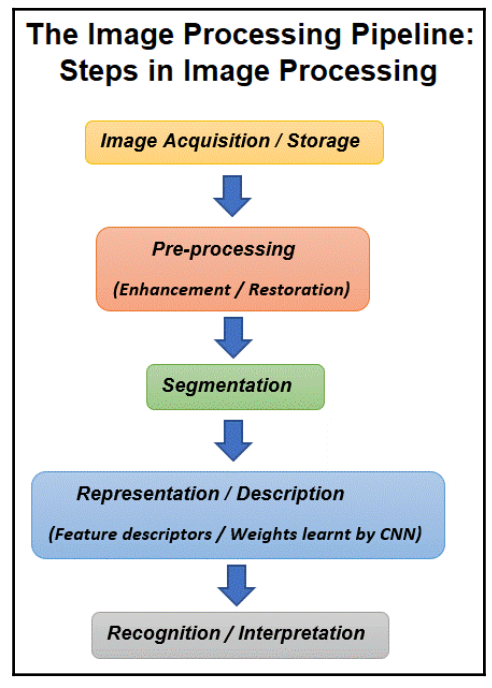

<b> Different modules that we are going to use for different image processing tasks: </b>

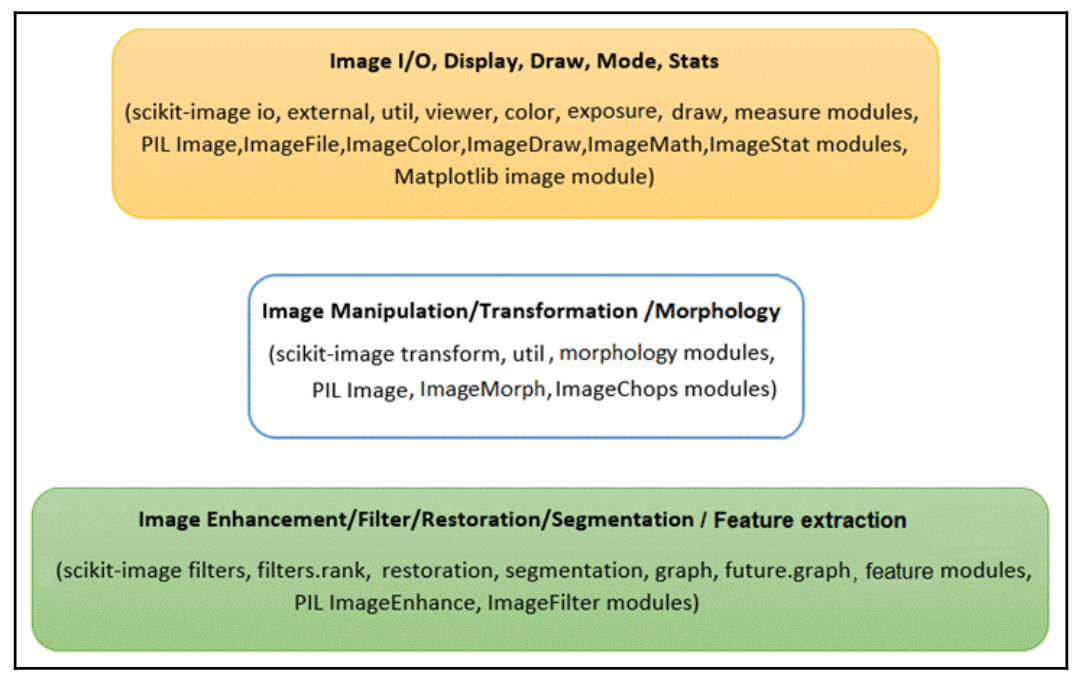

In addition to these libraries, we are going to use the following:
- scipy.ndimage and opencv for different image processing tasks
- scikit-learn for classical machine learning
- tensorflow and keras for deep learning

## <font color = orange> 4. Reading, saving, and displaying an image using PIL (Python Imaging Library) </font>

In [1]:
from PIL import Image, ImageFont, ImageDraw

im = ... # read the image, provide the correct path

print("Image Width: ", ...)
print("Image Height: ", ...)
print("Image mode: ", ...)
print("Image Format: ", ...)
print("Image Type: ", ...)

im.show() # display the image

Image Width:  404
Image Height:  316
Image mode:  RGB
Image Format:  JPEG
Image Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>


## <font color = orange> 5. Converting from RGB to gray using PIL </font>

In [2]:
im_g = ... # convert the RGB color image to a grayscale image
im_g.save(...) # save the image to disk
Image.open(...).show() # read the grayscale image from disk and show

## <font color = orange> 6. Reading, saving, and displaying an image using Matplotlib </font>

The next code block shows how to use the imread() function from matplotlib.image to read an image in a floating-point numpy ndarray. The pixel values are represented as real values between 0 and 1:

(316, 404, 3) uint8 <class 'numpy.ndarray'>


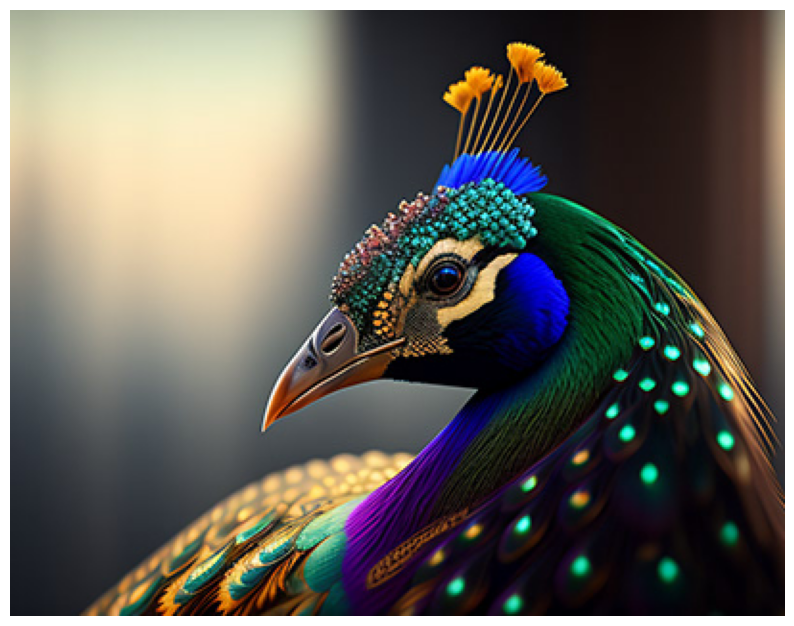

In [5]:
# import matplotlib.image as mpimg
import matplotlib.pylab as plt
import matplotlib.image as img

im = img.imread(...) # read the image from disk as a numpy ndarray
print(..., ..., ...) # this image contains an αchannel, hence num_channels= 4

plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()


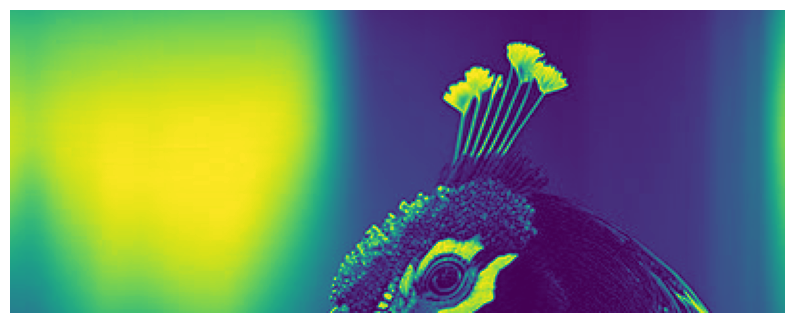

In [13]:
# image slicing 
im_sliced = ... # Rows, Cols, Channels

plt.figure(figsize=(10,10))
plt.imshow(im_sliced) # display the image
plt.axis('off')
plt.show()

## <font color = orange> 7. RGB to HSV using skimage </font>

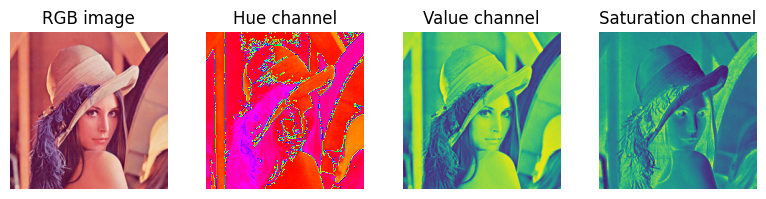

In [7]:
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage.color import rgb2hsv

# Read lenna image
rgb_img = ...

# convert to hsvt
hsv_img = ...

hue_img = hsv_img[:, :, 0] # First channel

saturation_img = hsv_img[:, :, 1] # Second

value_img = hsv_img[:, :, 2] # Third

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')

ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')

ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

ax3.imshow(saturation_img)
ax3.set_title("Saturation channel")
ax3.axis('off')

fig.tight_layout()


HSV images—each pixel is represented by three tuple (h, s, v) values:
- representing hue (color),
- saturation (colorfulness—how much the color is mixed with white)
- value (brightness—how much the color is mixed with black) 

The HSV model describescolors in a similar manner to how the human eye tends to perceive colors. 

# Lab 2: Hands-on Lab - Indexed-image and K-Means Clustering

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.color import rgb2gray, label2rgb
from skimage import io, transform

## Implement Utility

In [ ]:
class Utility:
    @staticmethod
    def rgb2ind(rgb_image, n_colors):
        """
        Converts an RGB image to an indexed image using K-means clustering with the specified number of colors.

        Parameters:
        rgb_image (numpy array): Input RGB image.
        n_colors (int): The number of colors to reduce the image to.

        Returns:
        indexed_image (numpy array): The image where each pixel is labeled by its color cluster.
        colormap (numpy array): The RGB values of the representative colors (clusters).
        labels (numpy array): The index of the cluster that each pixel belongs to.
        """

        # Step 1: Reshape the RGB image into a 2D array of pixels (rows are pixels, columns are RGB values)
        # The k means cluser is expecting to have data with this format
        pixels = ...  # Reshape to (total_pixels, 3), where each row is [R, G, B], use reshape
        print("First 5 pixels:\n", pixels[:5])  # Display only the first 5 pixels to avoid printing the entire array
        print('Image reshaped successfully')

        # Step 2: Apply K-means clustering to group the pixels into 'n_colors' clusters
        # K-means will find the 'n_colors' representative colors in the image
        kmeans = ...(...).fit(...) # Use Kmeans and let the number of clusters to be number of colors
        print('K-means has fit the pixels successfully')

        # Step 3: The cluster centers (colormap) represent the RGB values of the 'n_colors' representative colors
        colormap = ... # get the centers and store it in colormap
        print("First 5 colormap values:\n", colormap[:5])  # Display first 5 colors in the colormap for review

        # Step 4: The labels tell us which cluster each pixel belongs to (i.e., which representative color)
        labels = ... # get the labels and store it in labels
        print("First 10 labels:\n", labels[:10])  # Display the first 10 labels (i.e., the color index for each pixel)

        # Step 5: Reshape the labels back to the original image dimensions
        # 'labels' was a 1D array with length equal to the number of pixels; we reshape it to the original image's height and width
        height, width, _ = ...  # Get original image dimensions using shape
        indexed_image = labels.reshape(..., ...)  # Reshape the labels to match the image dimensions

        return indexed_image, colormap, labels

    @staticmethod
    def display_images(indexed_image, n_colors, colormap, rgb_image):
        """
        Displays the original image, the indexed image, and a histogram showing the color distribution.

        Parameters:
        indexed_image (numpy array): The image where each pixel is labeled by its color cluster.
        n_colors (int): The number of colors/clusters in the image.
        colormap (numpy array): The RGB values of the representative colors (clusters).
        rgb_image (numpy array): The original RGB image.
        """

        # Step 1: Compute the histogram of the indexed image
        # This shows the distribution of pixels among the 'n_colors' clusters
        histogram, bins = ...(..., bins= ..., density=True) # use np.histogram to and use the indexed image, np.arrange should have the n_colors +1

        # Step 2: Create a colormap that scales the representative colors to the range [0, 1]
        # This is necessary for plotting since matplotlib expects color values between 0 and 1
        cmap = ...(... / 255) # use listed color map

        # Step 3: Create subplots to show the original image, the indexed image, and the color histogram
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure with 3 subplots (side by side)

        # Step 4: Display the original RGB image
        ax[0].imshow(rgb_image)  # Show the original image in the first subplot
        ax[0].set_title('Original Image')  # Set the title for the first subplot

        # Step 5: Display the indexed image
        # The indexed image shows the pixels as color clusters using the representative colors (colormap)
        ax[1].imshow(label2rgb(indexed_image, colors=colormap, bg_label=-1))  # Convert labels to RGB colors for display
        ax[1].set_title('Indexed Image')  # Set the title for the second subplot

        # Step 6: Display the histogram showing the proportion of each color cluster in the image
        ax[2].bar(bins[:-1], histogram, width=1, color=cmap(np.arange(n_colors)))  # Plot histogram bars
        ax[2].set_xlabel('Color Index')  # Label the x-axis
        ax[2].set_ylabel('Relative Frequency')  # Label the y-axis
        ax[2].set_title('Color Histogram')  # Set the title for the histogram

        # Adjust the layout to ensure the subplots are spaced correctly
        plt.subplots_adjust(wspace=0.4)

        # Step 7: Display the figure with all subplots
        plt.show()


## Implement helper

In [ ]:
class Helper:
    @staticmethod
    def run_pipeline(img_file, n_colors=5, resizer = (128, 128)):
        # Print the original RGB image using skimage
        rgb_image = io.imread(...) # pass the file
        print("Original image array (first 1 rows):\n", rgb_image[:1])  # Display first 5 rows of the image array
        
        # Reshape the image to be 128 * 128 using transform.resize() in skimage
        rgb_image = transform.resize(..., ...)
        print("Reshaped image array (first 1 rows):\n", rgb_image[:1])  # Display first 5 rows of the reshaped image
        
        # Convert the RGB image to an indexed image with n colors
        n_colors = ...
        indexed_image, colormap, labels = ...(..., ...) # Use the utility to convert rgb2ind
        
        # Display the indexed image and colormap
        ... # use utility to display image


In [ ]:
Helper.run_pipeline(img_file='images/peacock.jpeg',
                    n_colors = 5,
                    resizer = (128,128),
                    )

# Week 5: Hands-on Sharpening Filters 

# Common Sharpening Filters in Image Processing

Sharpening filters highlight edges and enhance fine details in images, making them clearer and more defined. Here, we explore widely-used sharpening filters, each with specific use cases, strengths, and a detailed breakdown of how each method works.

---

## 1. Unsharp Masking
Unsharp masking is a technique that enhances edges by subtracting a blurred version of the image from the original. It is a versatile, widely-used filter in photography and digital imaging, known for enhancing overall image clarity without excessive noise.

### Equation
$$
\text{Sharpened Image} = \text{Original Image} + k \times (\text{Original Image} - \text{Blurred Image})
$$

- **Explanation of Terms**:
  - **Original Image**: The starting image we want to enhance.
  - **Blurred Image**: A smoothed version of the original, created using a Gaussian blur, which reduces noise and small details.
  - **\( k \)**: The scaling factor, controlling the strength of the edge enhancement. Higher values increase sharpness but can introduce noise.

### How It Works
1. **Blurring**: A Gaussian filter smooths the original image, creating a blurred version. This blurred image retains the main structures but loses fine details and edges.
2. **Edge Detection**: Subtracting the blurred image from the original highlights the edges, as this difference accentuates areas of intensity change.
3. **Scaling and Adding**: The edge-detected result is multiplied by \( k \) and added back to the original, increasing sharpness by enhancing only edge areas.

### Best Practice
- **Use For**: General sharpening of moderately blurred images without adding much noise.
- **Tips**: Adjust \( k \) carefully; higher values can introduce unwanted noise. This technique works well for general photo enhancement and balanced detail preservation.

---

## 2. Laplacian Filter
The Laplacian filter emphasizes edges by using the Laplacian operator, which calculates the second derivative of the image intensity. This filter is sensitive to areas with rapid changes in intensity, making it ideal for edge detection and sharpening.

### Equation
The Laplacian operator is:
$$
\nabla^2 f(x, y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$
where:
- **\( f(x, y) \)** is the intensity value at the pixel position \( (x, y) \).
- The second derivative (Laplacian) emphasizes areas where intensity changes quickly.

A commonly used Laplacian kernel:
$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

### How It Works
1. **Convolution**: The Laplacian kernel is convolved with the image, calculating the second derivative and emphasizing edges.
2. **Edge Emphasis**: Areas with rapid intensity changes (like edges) are highlighted, while smooth areas remain mostly unaffected.
3. **Optional Addition**: The resulting edge image can be added back to the original for an intensified sharpening effect.

### Best Practice
- **Use For**: Highlighting sharp edges in images with strong gradients, such as architectural photos or medical images.
- **Tips**: Best for grayscale images. Can be combined with other filters to improve results.

---

## 3. High-Pass Filter
A high-pass filter retains high-frequency components (edges) while removing low-frequency components (smooth areas), resulting in edge enhancement. This filter is commonly used in digital photography for high-detail sharpening.

### Equation
A typical high-pass filter kernel:
$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

### How It Works
1. **Edge Emphasis**: Applying this kernel emphasizes areas with high-intensity changes by amplifying edges.
2. **Combination with Original**: The result can be combined with the original image, providing a sharpened effect.

### Best Practice
- **Use For**: High-detail areas needing strong sharpening, like textured objects or landscapes.
- **Tips**: Be cautious, as this filter can also make noise more visible.

---

## 4. Sobel Filter
The Sobel filter is an edge detection technique that uses convolution kernels to measure intensity gradients in the image. It gives higher emphasis to pixels in the middle row or column, making it more sensitive to larger intensity changes and reducing noise.

### Sobel Kernels
- **Horizontal Sobel**:
  $$
  \begin{bmatrix}
  -1 & 0 & 1 \\
  -2 & 0 & 2 \\
  -1 & 0 & 1
  \end{bmatrix}
  $$
- **Vertical Sobel**:
  $$
  \begin{bmatrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1
  \end{bmatrix}
  $$

### How It Works
1. **Directional Filtering**: The filter is applied separately in the x and y directions using the corresponding kernels, which emphasizes edges aligned with the direction.
2. **Edge Detection**: The combined result from both directions provides the magnitude of the gradient, highlighting edges.

### Best Practice
- **Use For**: Detecting edges in noisy images where smoothing is also desired.
- **Tips**: Sobel is generally more resistant to noise due to the middle-weighted design, making it effective for natural images.

---

## 5. Prewitt Filter
The Prewitt filter is another gradient-based edge detection method similar to Sobel but simpler in design. It assigns equal weights across each row or column without extra emphasis on the center row or column.

### Prewitt Kernels
- **Horizontal Prewitt**:
  $$
  \begin{bmatrix}
  -1 & 0 & 1 \\
  -1 & 0 & 1 \\
  -1 & 0 & 1
  \end{bmatrix}
  $$
- **Vertical Prewitt**:
  $$
  \begin{bmatrix}
  -1 & -1 & -1 \\
  0 & 0 & 0 \\
  1 & 1 & 1
  \end{bmatrix}
  $$

### How It Works
1. **Gradient Detection**: The Prewitt operator also calculates gradients in both the x and y directions by applying each kernel separately, emphasizing horizontal or vertical edges.
2. **Edge Detection**: The equal weights allow for faster computation but slightly less sensitivity to intensity changes compared to Sobel.

### Best Practice
- **Use For**: Applications requiring quick edge detection where sensitivity to noise is less critical.
- **Tips**: Use Prewitt in cases where computational speed is more important than high edge sensitivity.
  
---

### Comparison: Sobel vs. Prewitt
| Feature                | Sobel Filter                                         | Prewitt Filter                           |
|------------------------|------------------------------------------------------|------------------------------------------|
| **Kernel Weights**     | Middle row/column has a weight of 2                  | Equal weights throughout                 |
| **Sensitivity**        | More sensitive to intensity changes                  | Less sensitive to intensity changes      |
| **Noise Resistance**   | More resistant to noise due to smoothing effect      | Less resistant to noise                  |
| **Computation**        | Slightly more computationally intensive              | Faster and simpler to compute            |

Both Sobel and Prewitt filters are commonly used edge detection techniques, with Sobel being preferred for sharper edge detection in noisy images, while Prewitt is often chosen for faster computation.

---

## 6. High-Boost Filtering
High-boost filtering extends unsharp masking by amplifying the original image’s intensity, producing even more pronounced edges and details.

### Equation
$$
\text{High-Boost Image} = A \cdot \text{Original Image} - \text{Blurred Image}
$$
where:
- \( A > 1 \) controls the enhancement level; values greater than 1 amplify detail retention.

### How It Works
1. **Amplification**: The original image is multiplied by \( A \), boosting the overall intensity.
2. **Edge Detection**: A blurred version of the image is subtracted to highlight edges while retaining image intensity.

### Best Practice
- **Use For**: Cases where unsharp masking alone isn’t enough, such as when details must be highly emphasized.
- **Tips**: High values of \( A \) increase noise; best used on low-noise images.

---

## 7. Frequency-Domain Filtering (Gaussian High-Pass)
In frequency-domain filtering, high frequencies are enhanced in the Fourier domain, allowing fine control over detail levels. This method is often used in scientific imaging and large images where precision is needed.

### Process
1. **Fourier Transform**: The image is transformed to the frequency domain.
2. **High-Frequency Emphasis**: A Gaussian high-pass filter isolates high frequencies, corresponding to edges and fine details.
3. **Inverse Fourier Transform**: The result is transformed back to the spatial domain for a sharpened image.

### Best Practice
- **Use For**: Large, complex images where precise control is needed.
- **Tips**: Useful in fields needing fine-tuned detail enhancement (e.g., astronomy, medical imaging).

---

## 8. Wavelet-Based Sharpening
Wavelet-based sharpening decomposes the image into frequency sub-bands, allowing selective enhancement of high-frequency components without affecting lower frequencies, providing smooth, noise-free sharpening.

### Process
1. **Decomposition**: The image is decomposed using wavelet transforms, breaking it into different frequency bands.
2. **Enhancement**: High-frequency sub-bands (which represent edges) are selectively enhanced.
3. **Reconstruction**: The image is reconstructed, incorporating enhanced high-frequency details.

### Best Practice
- **Use For**: High-quality sharpening in applications needing smooth detail preservation.
- **Tips**: Computationally intensive but effective for high-end applications needing refined sharpening without noise amplification.

---

## 9. Canny Edge Detection
The Canny Edge Detection filter is a multi-stage edge-detection algorithm known for its high precision in locating edges while minimizing noise. Unlike conventional sharpening filters, Canny focuses on enhancing only edge areas, making it a top choice for applications requiring distinct edges.

### Process
1. **Gaussian Blur**: Initially, a Gaussian blur is applied to reduce noise and ensure only significant edges are detected.
2. **Gradient Calculation**: The intensity gradient of each pixel is calculated to locate regions with sharp intensity changes.
3. **Non-Maximum Suppression**: This step refines the edges by suppressing all gradients except for the local maximums, ensuring thin, clear edges.
4. **Double Thresholding**: Two thresholds are applied to classify pixels into strong, weak, and non-edges.
5. **Edge Tracking by Hysteresis**: Weak edges connected to strong edges are retained, preserving edge continuity.

### Best Practice
- **Use For**: High-precision edge detection in applications that need well-defined outlines, such as medical imaging, face detection, and object recognition.
- **Tips**: Adjust the thresholds carefully to balance edge clarity with noise reduction. Canny is not typically used for general sharpening but excels at producing distinct edges.

### Gradient Equation
The Canny algorithm often uses the Sobel operator for calculating gradients:
$$
G = \sqrt{G_x^2 + G_y^2}
$$
where \( G_x \) and \( G_y \) are the gradients in the x and y directions, representing edge strength and direction.

---

## Comparison Table of Common Sharpening Filters

| Filter                   | Accuracy                          | Complexity         | Best Use Case                                   |
|--------------------------|-----------------------------------|--------------------|-------------------------------------------------|
| **Unsharp Masking**      | Moderate to High                 | Moderate           | General image sharpening with minimal noise     |
| **Laplacian Filter**     | High for edge enhancement        | Low                | Edge detection and high-contrast sharpening     |
| **High-Pass Filter**     | High                             | Moderate           | Enhancing textures and fine details             |
| **Sobel Filter**         | Moderate, with directional edges | Low to Moderate    | Edge detection with noise resistance            |
| **Prewitt Filter**       | Moderate                         | Low                | Fast edge detection in low-noise images         |
| **High-Boost Filtering** | High                             | High               | High-detail emphasis in low-noise environments  |
| **Gaussian High-Pass (Frequency Domain)** | Very High     | Very High          | Large, complex images needing precise control   |
| **Wavelet-Based Sharpening** | Very High                   | Very High          | High-end sharpening with smooth detail retention|
| **Canny Edge Detection** | Very High for edge precision     | High               | Applications requiring clear, distinct edges    |

This table compares sharpening filters commonly used in image processing based on their **accuracy** in sharpening, **computational complexity**, and **best use case** for each. It serves as a quick guide for choosing the appropriate filter based on the requirements of the specific image processing application.


## Apply filtering 

### Original Image

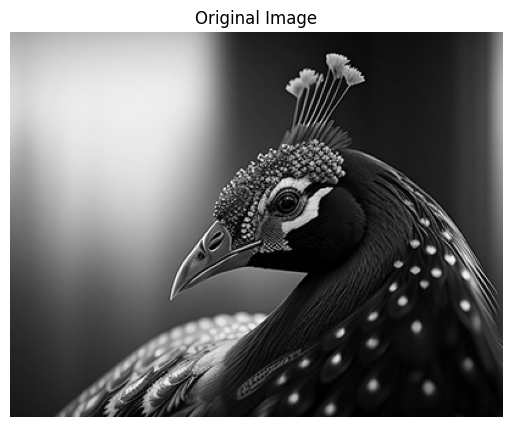

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the peacock image
image = cv2.imread('images/peacock.jpeg', cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for easier processing

# Display the original image
plt.figure(figsize=(10, 5))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


### Unsharp Masking

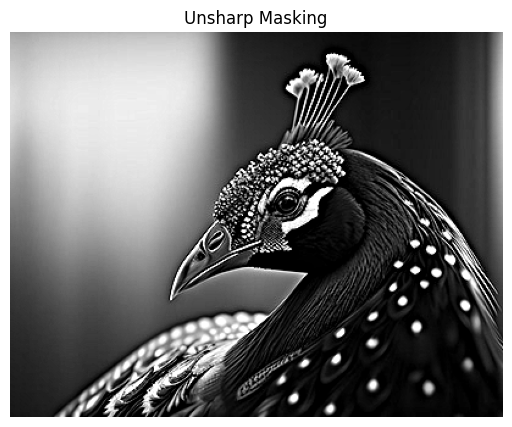

In [ ]:
# Apply Gaussian Blur to create the blurred image
blurred = cv2.GaussianBlur(image, (21, 21), 0)

# Define the sharpening factor k
k = 1.5

# Perform unsharp masking
unsharp_masked = cv2.addWeighted(image, 1 + k, blurred, -k, 0)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Unsharp Masking")
plt.imshow(unsharp_masked, cmap='gray')
plt.axis('off')
plt.show()


### Laplacian Filter

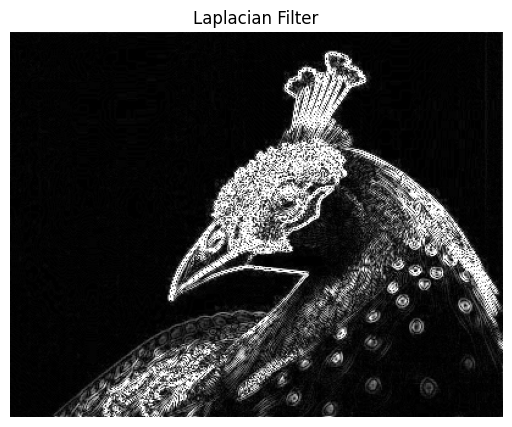

In [ ]:
# Apply the Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

# Convert back to uint8 format and rescale for display
laplacian = cv2.convertScaleAbs(laplacian)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Laplacian Filter")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')
plt.show()


### High Pass Filter

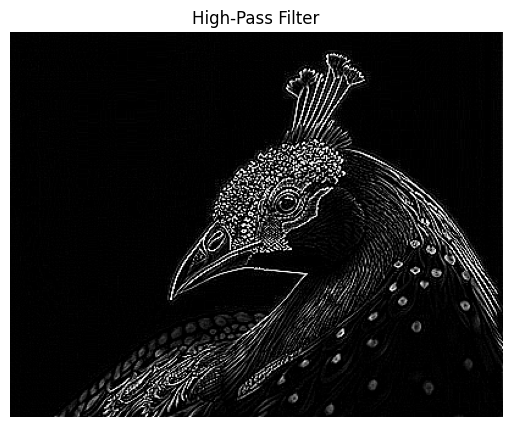

In [ ]:
# Define a high-pass filter kernel
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

# Apply the high-pass filter kernel
high_pass = cv2.filter2D(image, -1, high_pass_kernel)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("High-Pass Filter")
plt.imshow(high_pass, cmap='gray')
plt.axis('off')
plt.show()


### Sobel filter

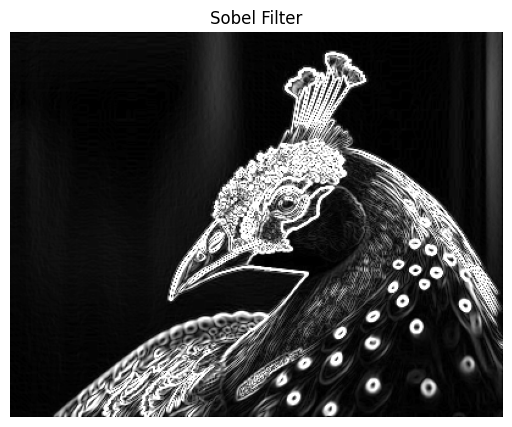

In [ ]:
# Apply Sobel filter in both horizontal and vertical directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combine Sobel results
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Convert back to uint8 format
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Sobel Filter")
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')
plt.show()


### Prewitt Filter

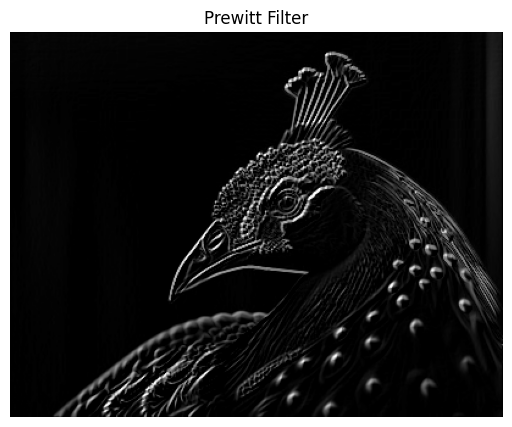

In [ ]:
# Define Prewitt kernels for x and y directions
prewitt_x = np.array([[ -1,  0,  1],
                      [ -1,  0,  1],
                      [ -1,  0,  1]])

prewitt_y = np.array([[ -1, -1, -1],
                      [  0,  0,  0],
                      [  1,  1,  1]])

# Apply Prewitt filter
prewitt_x_result = cv2.filter2D(image, -1, prewitt_x)
prewitt_y_result = cv2.filter2D(image, -1, prewitt_y)

# Combine Prewitt results
prewitt_combined = cv2.addWeighted(prewitt_x_result, 0.5, prewitt_y_result, 0.5, 0)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Prewitt Filter")
plt.imshow(prewitt_combined, cmap='gray')
plt.axis('off')
plt.show()


### High boost filter

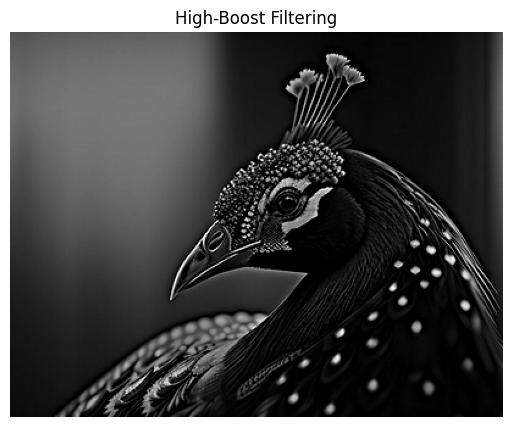

In [ ]:
# Define high-boost amplification factor A
A = 1.5

# Perform high-boost filtering
high_boost = cv2.addWeighted(image, A, blurred, -1, 0)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("High-Boost Filtering")
plt.imshow(high_boost, cmap='gray')
plt.axis('off')
plt.show()


Gaussian Filter

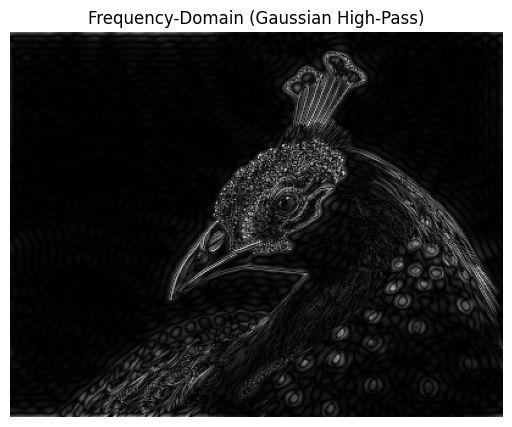

In [ ]:
# Apply Fourier Transform
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Create a Gaussian high-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.ones((rows, cols, 2), np.uint8)
r = 30  # Radius of the Gaussian high-pass filter
cv2.circle(mask, (ccol, crow), r, (0, 0), -1)

# Apply the mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Frequency-Domain (Gaussian High-Pass)")
plt.imshow(img_back, cmap='gray')
plt.axis('off')
plt.show()


### Wavelet filter

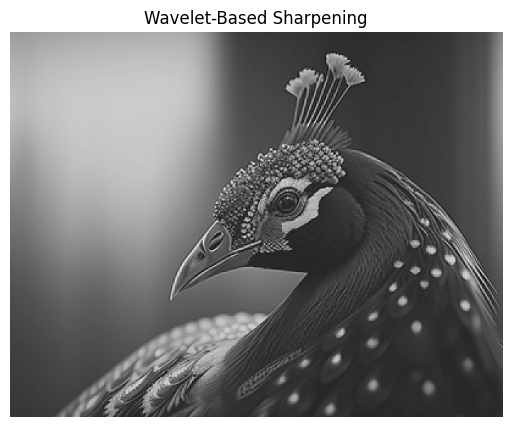

In [ ]:
import pywt

# Perform 2D wavelet transform
coeffs2 = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs2

# Enhance high-frequency components (LH, HL, HH)
LH *= 1.5
HL *= 1.5
HH *= 1.5

# Reconstruct image
coeffs2 = LL, (LH, HL, HH)
wavelet_sharpened = pywt.idwt2(coeffs2, 'haar')

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Wavelet-Based Sharpening")
plt.imshow(wavelet_sharpened, cmap='gray')
plt.axis('off')
plt.show()


### Canni Edge Detection

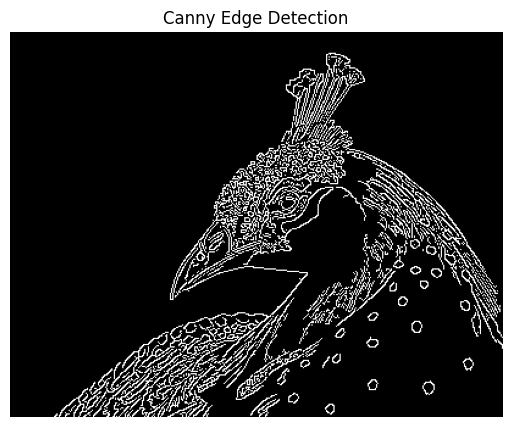

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Set thresholds for Canny Edge Detection
low_threshold = 50
high_threshold = 150

# Load the image in grayscale
image = cv2.imread('images/peacock.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection
edges = cv2.Canny(image, low_threshold, high_threshold)

# Display the result
plt.figure(figsize=(10, 5))
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


### All Filters in Action

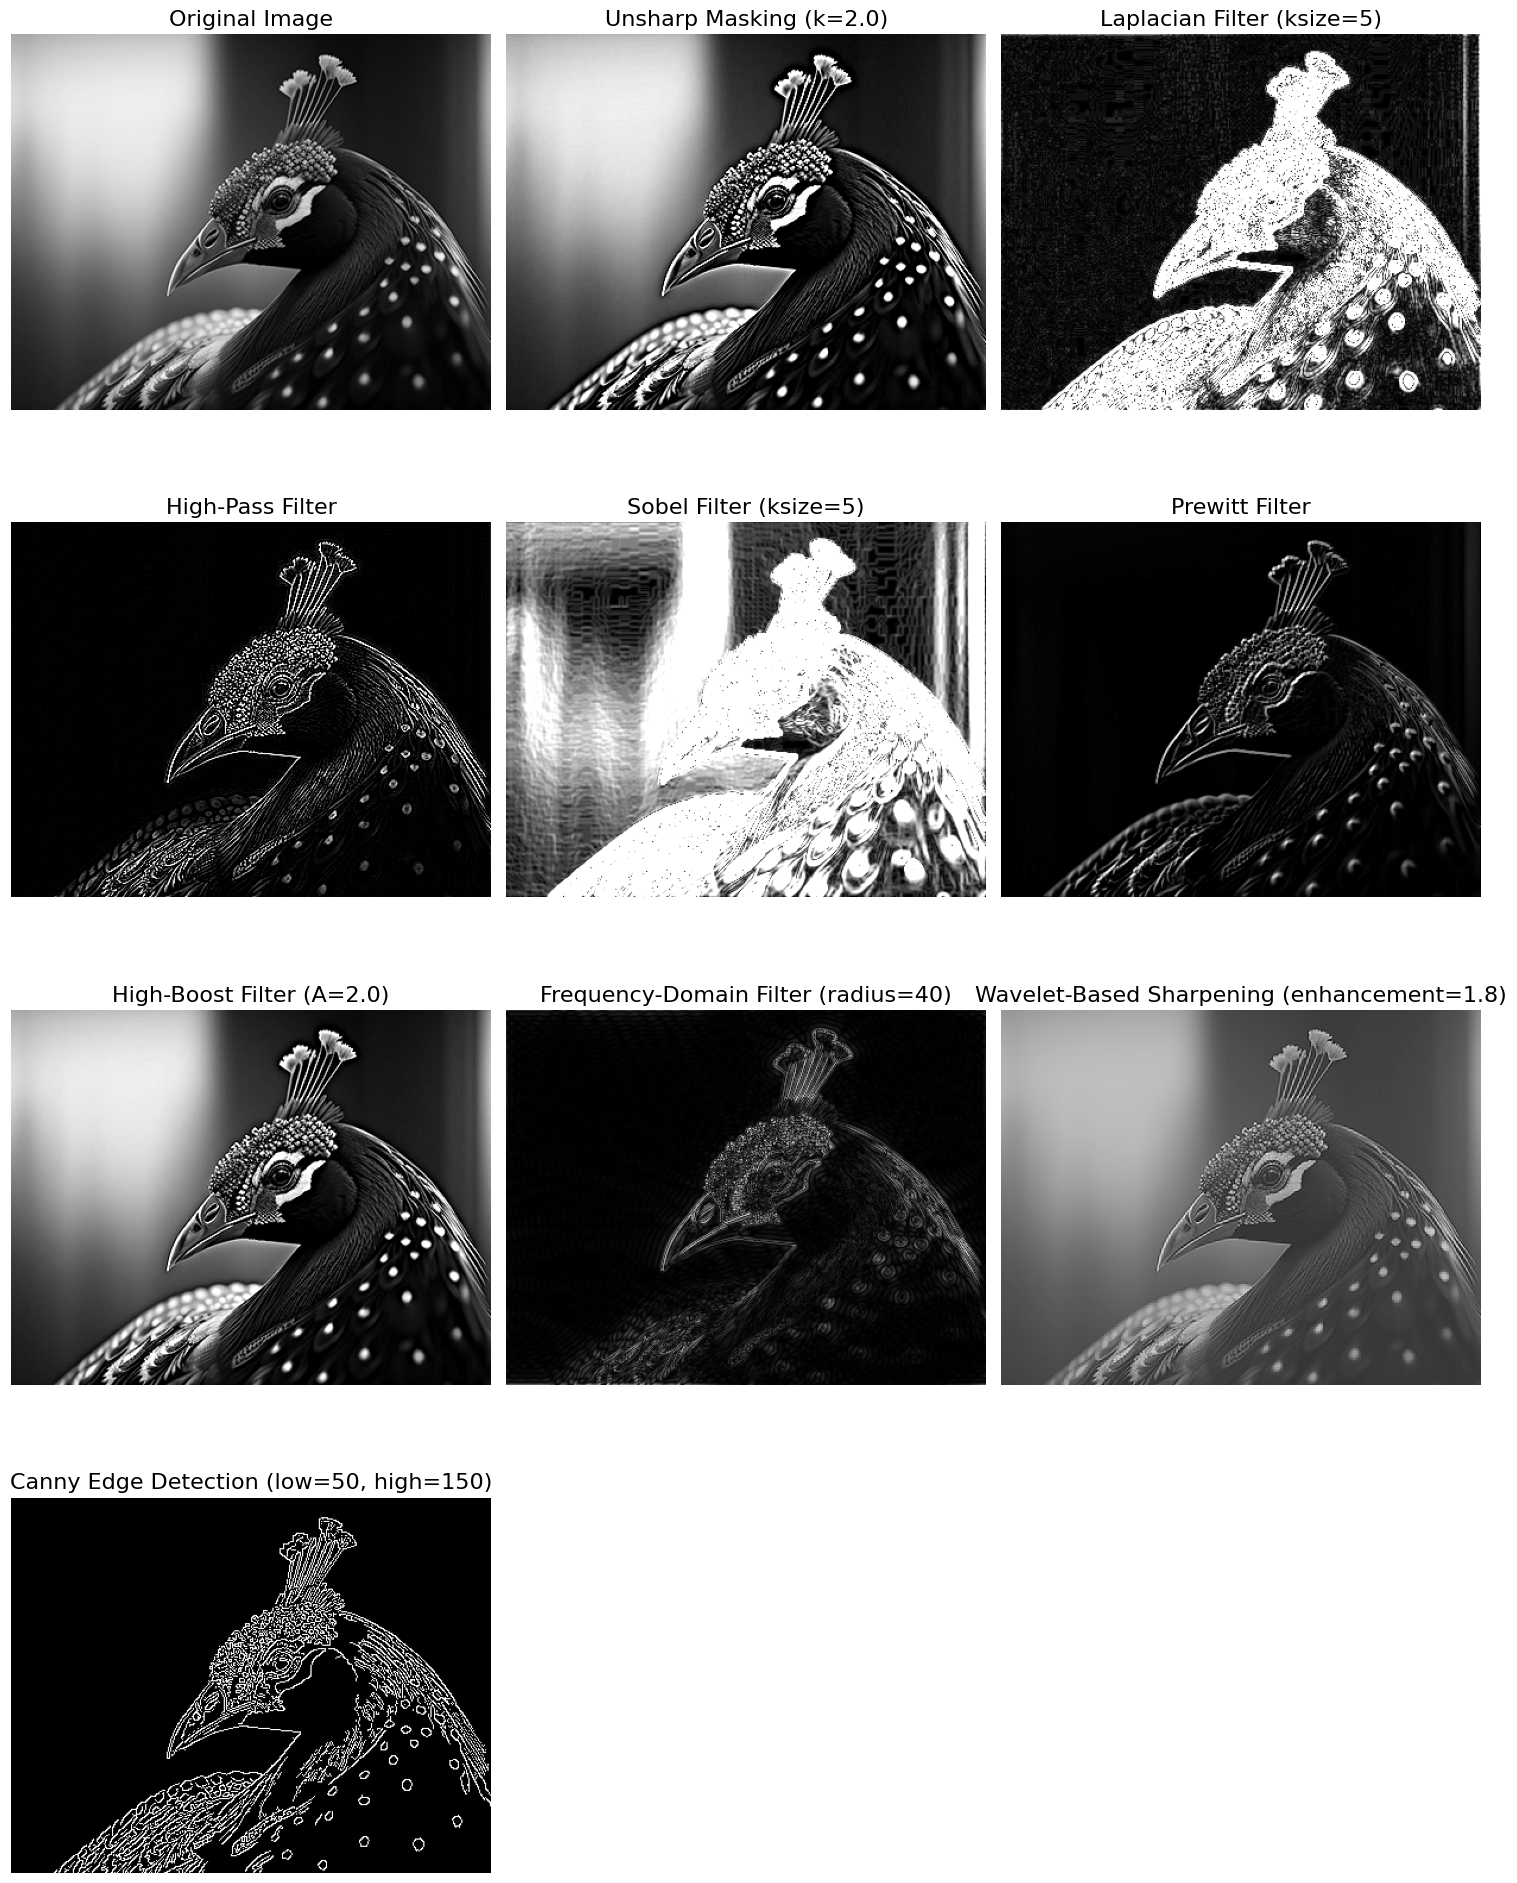

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

class Utility:
    
    def __init__(self, image_path):
        # Load the image when the class is instantiated
        self.image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    def unsharp_masking(self, k=1.5, blur_ksize=(21, 21)):
        # Apply Gaussian blur with a specified kernel size
        blurred = ... # From CV2 Gaussian blur image 
        unsharp_masked = ... # Unsharp_masked filter (add weighted function from cv2)
        return unsharp_masked
    
    def laplacian_filter(self, ksize=3):
        # Apply Laplacian filter with a specified kernel size
        laplacian = ...
        laplacian = ...
        return laplacian
    
    def high_pass_filter(self, kernel=None):
        # Use a custom kernel if provided, otherwise use a default high-pass kernel
        if kernel is None:
            kernel = ... # Apply the HPF KERNEL
        high_pass = ... # Use Filter2D
        return high_pass
    
    def sobel_filter(self, ksize=3):
        # Apply Sobel filter with a specified kernel size for both x and y directions
        sobel_x = ...
        sobel_y = ... # 0 is x and 1 is y
        sobel_combined = ... # combine magnituded
        sobel_combined = cv2.convertScaleAbs(sobel_combined)
        return sobel_combined
    
    def prewitt_filter(self, kernel_x=None, kernel_y=None):
        # Use custom Prewitt kernels if provided, otherwise use default Prewitt kernels
        if kernel_x is None:
            kernel_x = ... # The array
        if kernel_y is None:
            kernel_y = ... # The array
        prewitt_x_result = ... # Adding the kernel to the image (using filter 2d)
        prewitt_y_result = ... # Adding the kernel of y to the image
        prewitt_combined = ...
        return prewitt_combined
    
    def high_boost_filter(self, A=1.5, blur_ksize=(21, 21)):
        # Apply Gaussian blur with a specified kernel size, then perform high-boost filtering
        blurred = ...
        high_boost = ... # Apply equation of high boost (the amplification)
        return high_boost
    
    def frequency_domain_filter(self, radius=30):
        # Apply Gaussian high-pass filter in the frequency domain
        dft = cv2.dft(np.float32(self.image), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)
        rows, cols = self.image.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.ones((rows, cols, 2), np.uint8)
        cv2.circle(mask, (ccol, crow), radius, (0, 0), -1)
        fshift = dft_shift * mask
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
        return img_back
    
    def wavelet_based_sharpening(self, enhancement_factor=1.5):
        # Enhance high-frequency components in wavelet sub-bands
        coeffs2 = pywt.dwt2(self.image, 'haar')
        LL, (LH, HL, HH) = coeffs2
        LH *= enhancement_factor
        HL *= enhancement_factor
        HH *= enhancement_factor
        coeffs2 = LL, (LH, HL, HH)
        wavelet_sharpened = pywt.idwt2(coeffs2, 'haar')
        return wavelet_sharpened
    
    def canny_edge_detection(self, low_threshold=50, high_threshold=150):
        # Apply Canny Edge Detection
        edges = cv2.Canny(self.image, low_threshold, high_threshold)
        return edges
    
    def plot_images(self, images, titles, ncols=3):
        # Plot images in a grid
        nrows = (len(images) + ncols - 1) // ncols
        plt.figure(figsize=(15, 5 * nrows))
        for i, (img, title) in enumerate(zip(images, titles)):
            plt.subplot(nrows, ncols, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(title, fontsize=16)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

class Helper:
    @staticmethod
    def run_pipeline(k_unsharp=2.0, ksize_laplace=5, ksize_sobel=5,
                     A_highboost=2.0, radius_freq_domain=40,
                     wavelet_factor=1.8, low_threshold_canny=50, high_threshold_canny=150):
        # Helper: Instantiate the Utility class and apply filters
        utility = Utility('images/peacock.jpeg')

        # Apply each filter and store results with customized parameters if needed
        images = [
            utility.image,
            utility.unsharp_masking(k=k_unsharp),
            utility.laplacian_filter(ksize=ksize_laplace),
            utility.high_pass_filter(),
            utility.sobel_filter(ksize=ksize_sobel),
            utility.prewitt_filter(),
            utility.high_boost_filter(A=A_highboost),
            utility.frequency_domain_filter(radius=radius_freq_domain),
            utility.wavelet_based_sharpening(enhancement_factor=wavelet_factor),
            utility.canny_edge_detection(low_threshold=low_threshold_canny, high_threshold=high_threshold_canny)
        ]

        # Titles for each result
        titles = [
            "Original Image",
            "Unsharp Masking (k=2.0)",
            "Laplacian Filter (ksize=5)",
            "High-Pass Filter",
            "Sobel Filter (ksize=5)",
            "Prewitt Filter",
            "High-Boost Filter (A=2.0)",
            "Frequency-Domain Filter (radius=40)",
            "Wavelet-Based Sharpening (enhancement=1.8)",
            "Canny Edge Detection (low=50, high=150)"
        ]

        # Plot all images in a single figure with subplots
        utility.plot_images(images, titles)

# Run the pipeline
Helper.run_pipeline()


# Introduction to JPEG Compression

<img src = "JpegEncoding.png">

        Convert RGB to YUV for better compression of color channels.
        Split the image into 8x8 blocks.
        Apply DCT to each block, transforming pixels to frequencies.
        Quantize the DCT coefficients, keeping the low frequencies and discarding less visible high frequencies.
        Zigzag Order arranges coefficients to maximize consecutive zeros.
        DPCM compresses the DC component by encoding differences between adjacent blocks.
        RLC compresses the AC component by counting consecutive zeros.
        Entropy Code the DPCM and RLC data for efficient storage.
        Header contains metadata required to decode the image.

[Click here to view the Jpeg Encoding Full Details PDF Reference](ImageCompression.pdf)


### Jpeg Coding

In [4]:
from PIL import Image # Pillow library
import os

In [ ]:
input_path = "images/peacock.jpeg"
image = Image.open(input_path)

In [ ]:
compression_quality = 30 # Adjust the compression quality as needed
output_path = "images/peacock_compressed.jpeg"
image.save(output_path, 'JPEG', quality = compression_quality)

In [11]:
file_size = os.path.getsize(input_path)
compressed_file_size = os.path.getsize(output_path)
print(f"The input file size: {file_size} bytes","\n", f"The compressed file size: {compressed_file_size} bytes")

The input file size: 57934 bytes 
 The compressed file size: 10711 bytes
